In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Your Neural Network and ActivationFunctions classes here...
from MyNeuralNetwork import MyNeuralNetwork

def plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation, min, max, title):
    # Plot scatter plot for real vs predicted values
    fig, ax = plt.subplots()
    ax.scatter(y_test, predictions)
    ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, color='gray')  # Diagonal line for reference
    plt.xlim([min,max])
    plt.ylim([min,max])
    ax.set_title(f"Structure: {structure}, Epochs: {epochs}, LR: {lr}, Momentum: {momentum}, Activation: {activation}")
    ax.set_xlabel("Real Values")
    ax.set_ylabel("Predicted Values")
    plt.savefig(f"{title}_scatter_plot_{structure}_{epochs}_{lr}_{momentum}_{activation}.png")  # Save the scatter plot
    plt.show()

def plot_errors(nn, structure, epochs, lr, momentum, activation, title):
    # Plot the evolution of training and validation errors
    error_train, error_val = nn.loss_epochs()
    epochs_range = range(1, len(error_train) + 1)

    plt.plot(epochs_range, error_train, label='Training Error')
    plt.plot(epochs_range, error_val, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Error: {structure}, Epochs: {epochs}, LR: {lr}, Momentum: {momentum}, Activation: {activation}')
    plt.legend()
    plt.savefig(f"{title}_error_plot_{structure}_{epochs}_{lr}_{momentum}_{activation}.png")  # Save the error plot
    plt.show()

def run_neural_network(x_train, x_test, y_train, y_test, min, max, title):
    # Define hyperparameter combinations to try
    print(x_train.shape[1])
    layer_structures = [(x_train.shape[1], 8, 1), (x_train.shape[1], 4, 1)]
    epochs_values = [500, 1000]
    learning_rates = [0.01]
    momentum_values = [0.1]
    activation_functions = ["sigmoid"]

    # Initialize variables to store results
    min_mape = float('inf')
    best_params = None
    all_results = []

    y_test = y_test * 0.8 + 0.1
    y_test = y_test * (max - min) + min	# Denormalize

    # Iterate over hyperparameter combinations
    for structure, epochs, lr, momentum, activation in product(layer_structures, epochs_values, learning_rates, momentum_values, activation_functions):
        # Ensure the last layer has only one neuron
        structure = list(structure[:-1]) + [1]

        # Initialize and train the neural network
        nn = MyNeuralNetwork(layers=structure, epochs=epochs, lr=lr, momentum=momentum, fact=activation)
        nn.fit(x_train, y_train)

        # Evaluate on the test set
        predictions = nn.predict(x_test)
        predictions = predictions * 0.8 + 0.1
        predictions = predictions * (max - min) + min	# Denormalize
        mape = mean_absolute_percentage_error(y_test, predictions)

        # Record results
        all_results.append({
            'Structure': structure,
            'Epochs': epochs,
            'Learning Rate': lr,
            'Momentum': momentum,
            'Activation': activation,
            'MAPE': mape
        })

        # Check if current model has the minimum MAPE
        if mape < min_mape:
            min_mape = mape
            best_params = {
                'Structure': structure,
                'Epochs': epochs,
                'Learning Rate': lr,
                'Momentum': momentum,
                'Activation': activation,
                'MAPE': mape
            }

        # Plot scatter plot for real vs predicted values
        plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation, min, max, title)

        # Plot error evolution
        plot_errors(nn, structure, epochs, lr, momentum, activation, title)

    # Print the best hyperparameters
    print("All Results:")
    print(pd.DataFrame(all_results))
    print("Best Hyperparameters:")
    print(pd.DataFrame(best_params))


# Dataset 1

4
Training - epoch:  0 Error:  6.277106259744077
Validation - epoch:  0 Error:  1.785273958953001
Training - epoch:  1 Error:  6.283847831257403
Validation - epoch:  1 Error:  1.7871656477726523
Training - epoch:  2 Error:  6.283594349956593
Validation - epoch:  2 Error:  1.7870785172473538
Training - epoch:  3 Error:  6.2833421446837106
Validation - epoch:  3 Error:  1.7869918269281546
Training - epoch:  4 Error:  6.283091071430338
Validation - epoch:  4 Error:  1.786905528066519
Training - epoch:  5 Error:  6.282840989027448
Validation - epoch:  5 Error:  1.7868195728722462
Training - epoch:  6 Error:  6.2825917588577065
Validation - epoch:  6 Error:  1.786733914416877
Training - epoch:  7 Error:  6.282343244577729
Validation - epoch:  7 Error:  1.7866485065405349
Training - epoch:  8 Error:  6.282095311850714
Validation - epoch:  8 Error:  1.7865633037622108
Training - epoch:  9 Error:  6.281847828088219
Validation - epoch:  9 Error:  1.7864782611931351
Training - epoch:  10 Error: 

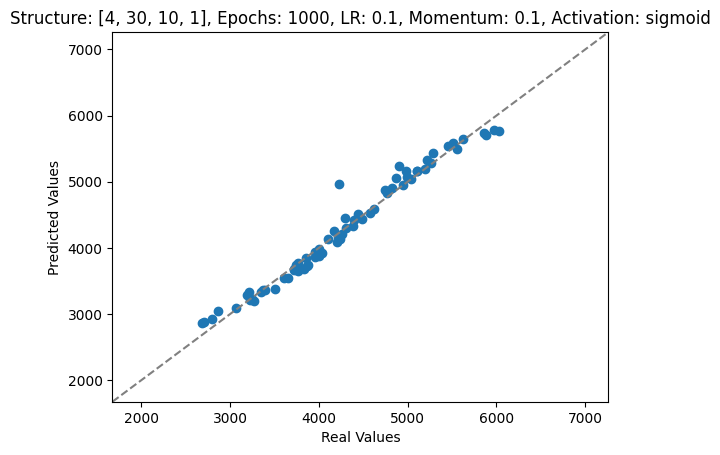

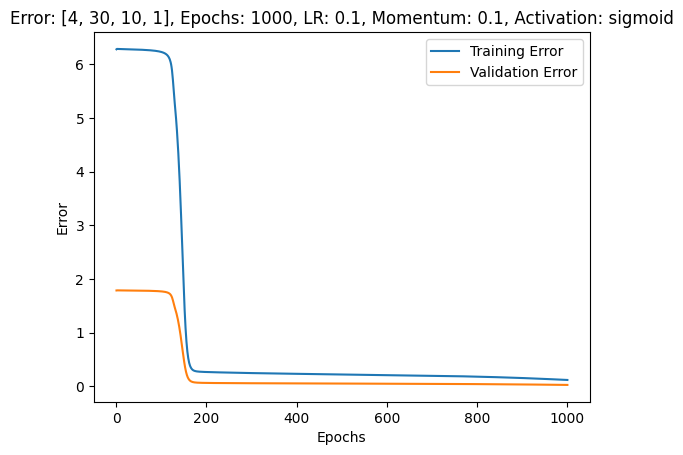

All Results:
        Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0  [4, 30, 10, 1]    1000            0.1       0.1    sigmoid  0.022572
Best Hyperparameters:
   Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0          4    1000            0.1       0.1    sigmoid  0.022572
1         30    1000            0.1       0.1    sigmoid  0.022572
2         10    1000            0.1       0.1    sigmoid  0.022572
3          1    1000            0.1       0.1    sigmoid  0.022572


In [36]:
# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

min = np.min(y1["power"])
max = np.max(y1["power"])

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)
y1 = scaler.fit_transform(y1)
y1 = y1 * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=42)


# Call the run_neural_network function
run_neural_network(x1_train, x1_test, y1_train, y1_test, min, max, "turbine")

# Dataset 2

In [ ]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x2, y2 = df2.drop(["z"], axis=1), df2[["z"]]

min = np.min(y2["z"])
max = np.max(y2["z"])

# Scale the features and target variable to the range [0, 1]
x2 = scaler.fit_transform(x2)
y2 = scaler.fit_transform(y2)
y2 = y2 * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x2_train, x2_test, y2_train, y2_test, min, max, "synthetic")

# Dataset 3

52
Training - epoch:  0 Error:  42.87104806401256
Validation - epoch:  0 Error:  10.821148770047685
Training - epoch:  1 Error:  42.87101675033492
Validation - epoch:  1 Error:  10.821141803390047
Training - epoch:  2 Error:  42.87098528922205
Validation - epoch:  2 Error:  10.821134804694818
Training - epoch:  3 Error:  42.87095367699111
Validation - epoch:  3 Error:  10.821127773143514
Training - epoch:  4 Error:  42.87092190989925
Validation - epoch:  4 Error:  10.821120707904825
Training - epoch:  5 Error:  42.87088998414411
Validation - epoch:  5 Error:  10.821113608134032
Training - epoch:  6 Error:  42.87085789586085
Validation - epoch:  6 Error:  10.821106472972707
Training - epoch:  7 Error:  42.87082564112035
Validation - epoch:  7 Error:  10.821099301548184
Training - epoch:  8 Error:  42.870793215927094
Validation - epoch:  8 Error:  10.821092092973194
Training - epoch:  9 Error:  42.87076061621703
Validation - epoch:  9 Error:  10.821084846345345
Training - epoch:  10 Erro

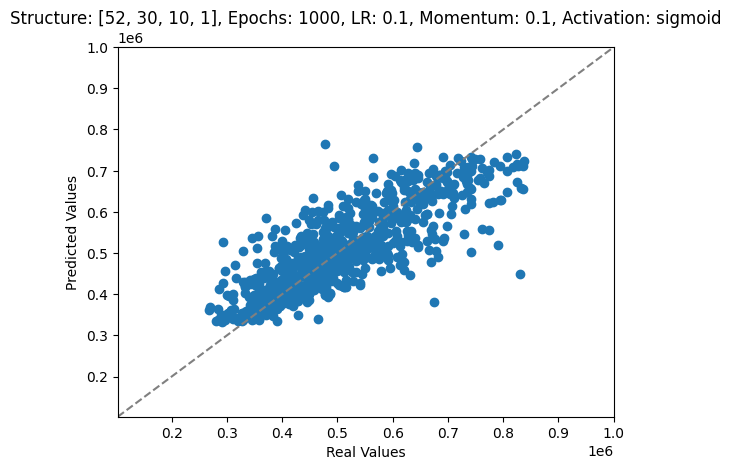

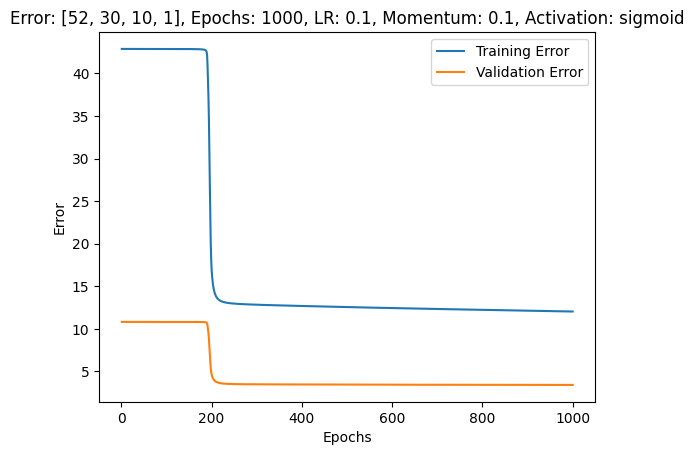

All Results:
         Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0  [52, 30, 10, 1]    1000            0.1       0.1    sigmoid  0.101585
Best Hyperparameters:
   Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0         52    1000            0.1       0.1    sigmoid  0.101585
1         30    1000            0.1       0.1    sigmoid  0.101585
2         10    1000            0.1       0.1    sigmoid  0.101585
3          1    1000            0.1       0.1    sigmoid  0.101585


In [35]:
# Read data from CSV file
df3 = pd.read_csv('data.csv', sep=",", decimal=".")

# Calculate z-scores for the 'price' column and filter out values with z-scores greater than 0.8 for data normalization
from scipy.stats import zscore
z_scores = zscore(df3["price"])
abs_z_scores = np.abs(z_scores)
df3 = df3[(abs_z_scores < 0.8)]

# Drop redundant columns from the DataFrame
df3 = df3.drop(["date", "waterfront", "view", "yr_built", "yr_renovated", "street", "statezip", "country"], axis=1)

# Check for missing values in the DataFrame (There are no missing values)
missing_values = df3.isnull().sum()

# Perform one-hot encoding for the 'city' column to get rid of categorical data
df3 = pd.get_dummies(df3, columns=['city'])
# Convert boolean values to integers (1 for True, 0 for False)
df3 = df3.astype(int)

# Separate features (x3) and target variable (y3)
x3, y3 = df3.drop(["price"], axis=1), df3[["price"]]

min = np.min(y3["price"])
max = np.max(y3["price"])

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x3 = scaler.fit_transform(x3)
y3 = scaler.fit_transform(y3)
y3 = y3 * 0.8 + 0.1  # Transform y3 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x3_train, x3_test, y3_train, y3_test, min, max, "housing")